# Second Machine learning model to integrate with Mobile application.

Using a second dataset, the correlation between first model(EEG and workload level) and this model is calculated. Mobile application uses this correlation to rectify the workload level to get an accurate value using that correction factor.

# Data Loading and Preprocessing

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

excel_file = "workload_data.xlsx"

# Read data from the Excel file
data = pd.read_excel(excel_file)

# Extract features (x) and target variable (y)
x = data[["time taken", "accuracy scored"]]
y = data["WL"]

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# Model Building

In [20]:
# Create the SVM model
model = SVC(kernel='linear')

# Train the model on the training data
model.fit(x_train, y_train)


SVC(kernel='linear')

# Confusion matrix

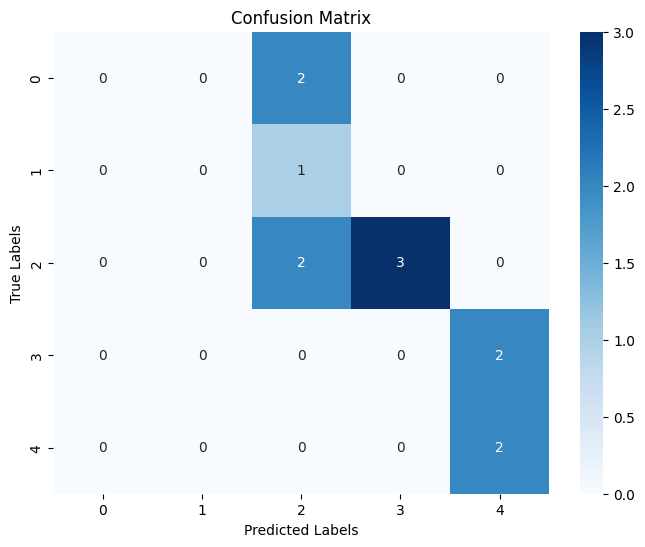

In [21]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predicting workload

In [22]:
# Function to predict workload level based on task performance accuracy and time taken
def predict_workload_from_input():

    accuracy = float(input("Enter task performance accuracy (%): "))
    time_taken = float(input("Enter time taken (seconds): "))

    # Scale the input data
    input_data_scaled = scaler.transform([[accuracy, time_taken]])

    # Predict workload level
    predicted_level = model.predict(input_data_scaled)[0]

    return predicted_level


predicted_level = predict_workload_from_input()
print(f"Predicted workload level: {predicted_level}")


Enter task performance accuracy (%): 90
Enter time taken (seconds): 120
Predicted workload level: 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
